In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
import sqlite3
import numpy as np


C:\Users\pcozz\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [60]:

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('../database.db')

# Consulta SQL para selecionar os dados da tabela desejada
query = "SELECT * FROM vaga;"

# Ler os dados do banco de dados SQLite para um DataFrame do Pandas
dados = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()
# dados = pd.read_csv("linkedin_jobs.csv")


In [61]:
dados = dados.reset_index(drop=True)
dados.set_index('id', inplace=True)


In [62]:
dados.describe()

,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
count,2001,2001,2001,2001,1243,1759,1759,1759,1756,1757
unique,672,35,44,2001,2,7,5,36,91,853
top,Desenvolvedor,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,DESCRIÇÃOProfissional irá fazer parte do nosso...
freq,165,1193,338,1,1045,890,1687,1191,453,12


In [63]:
dados_tec=dados[dados['title'].str.contains("QA|Implantação|Programação|Desenvolvedor|Programador|Developer|Analista|Desenvolvimento|Engenheiro|Software|Estágio|Tecnologicas|Tecnologia|Computação|Tech|stack|Dev|Data|Desenvolver|TI",case=False, regex=True)]

In [6]:
dados_tec

,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,
1,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...
2,Desenvolvedor,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...
3,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",None
4,Desenvolvedor full stack jr,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Assistente,Contrato,Tecnologia da informação,Serviços de gestão estratégica,Olá Dev.Estamos com posições em andamento aqui...
5,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,Seja um dos 25 primeiros a se candidatar,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ..."
...,...,...,...,...,...,...,...,...,...,...
1996,Analista e Desenvolvedor Progress Totvs Datasul,"São Paulo, SP",Há 3 dias,https://br.linkedin.com/jobs/view/analista-e-d...,Seja um dos 25 primeiros a se candidatar,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Oportunidade de vagas como analista desenvolve...
1997,DESENVOLVEDOR(A) BACK END - PLENO - Back-End |...,"São Paulo, SP",Há 2 dias,https://br.linkedin.com/jobs/view/desenvolvedo...,Seja um dos 25 primeiros a se candidatar,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Desenvolvimento de software,"HabilidadesLaravel, PHP, ReactJS, Vue.jsO que ..."
1998,Desenvolvedor Java Sênior,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,None,None,None,None,None,None


In [7]:
dados_tec[dados_tec.duplicated()]

,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,


In [8]:
dados_tec.isnull().sum()

title                 0
location              0
time_opened           0
link                  0
applications        755
experience_level    241
job_type            241
role                241
sectors             244
description         243
dtype: int64

In [9]:
dados_tec.applications.value_counts()

applications
Seja um dos 25 primeiros a se candidatar    1034
Mais de 200 candidaturas                     196
Name: count, dtype: int64

In [10]:
dados_tec.applications.fillna('Hidden',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\4249411417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.applications.fillna('Hidden',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\4249411417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.applications.fillna('Hidden',inplace=True)


In [11]:
dados_tec.loc[dados['applications']=='Seja um dos 25 primeiros a se candidatar','applications']="<=25"

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\201576818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.loc[dados['applications']=='Seja um dos 25 primeiros a se candidatar','applications']="<=25"


In [12]:
dados_tec.loc[dados['applications']=='Mais de 200 candidaturas','applications']=">25"

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\4115778453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.loc[dados['applications']=='Mais de 200 candidaturas','applications']=">25"


In [13]:
dados_tec.applications.value_counts()

applications
<=25      1034
Hidden     755
>25        196
Name: count, dtype: int64

In [14]:
dados_tec.isnull().sum()

title                 0
location              0
time_opened           0
link                  0
applications          0
experience_level    241
job_type            241
role                241
sectors             244
description         243
dtype: int64

In [15]:
dados_tec.experience_level.value_counts()

experience_level
Assistente       880
Pleno-sênior     499
Não aplicável    354
Executivo          5
Diretor            4
Estágio            1
Júnior             1
Name: count, dtype: int64

In [16]:
dados_tec.experience_level.fillna('Assistente',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\1583094988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.experience_level.fillna('Assistente',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\1583094988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.experience_level.fillna('Assistente',inplace=Tru

In [17]:
dados_tec.experience_level.value_counts()

experience_level
Assistente       1121
Pleno-sênior      499
Não aplicável     354
Executivo           5
Diretor             4
Estágio             1
Júnior              1
Name: count, dtype: int64

In [18]:
dados_tec.job_type.value_counts()

job_type
Tempo integral    1673
Contrato            68
Estágio              2
Outro                1
Name: count, dtype: int64

In [19]:
dados_tec.job_type.fillna('Tempo integral',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\3450007596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.job_type.fillna('Tempo integral',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\3450007596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.job_type.fillna('Tempo integral',inplace=True)


In [20]:
dados_tec.role.value_counts()

role
Engenharia e Tecnologia da informação                             1190
Tecnologia da informação                                           272
Desenvolvimento de negócios e Vendas                               125
Outro                                                               78
Engenharia                                                          11
Recursos humanos                                                     9
Analista                                                             7
Gerenciamento e Manufatura                                           3
Administração                                                        3
Publicidade                                                          3
Tecnologia da informação e Desenvolvimento de negócios               3
Educação e Treinamento                                               3
Gestão de produtos e Marketing                                       3
Estratégia/Planejamento                                              3
F

In [21]:
dados_tec.role.fillna('Engenharia e Tecnologia da informação',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\3605342044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.role.fillna('Engenharia e Tecnologia da informação',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\3605342044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.role.fillna('Engenharia e Tecnolo

In [22]:
dados_tec.sectors.value_counts()

sectors
Atividades dos serviços de tecnologia da informação                                                                                                              452
Tecnologia, Informação e Internet                                                                                                                                201
Fornecimento e gestão de recursos humanos                                                                                                                        187
Segurança de redes e computadores                                                                                                                                116
Recrutamento e seleção de pessoal                                                                                                                                 79
                                                                                                                                                                ... 
La

In [23]:
dados_tec.sectors.fillna('Atividades dos serviços de tecnologia da informação',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\2035285023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.sectors.fillna('Atividades dos serviços de tecnologia da informação',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\2035285023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.sectors.fillna('

In [24]:
dados_tec.description.fillna('Sem descrição',inplace=True)

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\2141726329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_tec.description.fillna('Sem descrição',inplace=True)
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\2141726329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tec.description.fillna('Sem descrição',inplace=True)


In [25]:
dados_tec

,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description
id,,,,,,,,,,
1,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...
2,Desenvolvedor,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...
3,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Sem descrição
4,Desenvolvedor full stack jr,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Contrato,Tecnologia da informação,Serviços de gestão estratégica,Olá Dev.Estamos com posições em andamento aqui...
5,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ..."
...,...,...,...,...,...,...,...,...,...,...
1996,Analista e Desenvolvedor Progress Totvs Datasul,"São Paulo, SP",Há 3 dias,https://br.linkedin.com/jobs/view/analista-e-d...,<=25,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Oportunidade de vagas como analista desenvolve...
1997,DESENVOLVEDOR(A) BACK END - PLENO - Back-End |...,"São Paulo, SP",Há 2 dias,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Desenvolvimento de software,"HabilidadesLaravel, PHP, ReactJS, Vue.jsO que ..."
1998,Desenvolvedor Java Sênior,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição


In [26]:
dados_nao_nulos = dados_tec
dados_nao_nulos.isnull().sum()

title               0
location            0
time_opened         0
link                0
applications        0
experience_level    0
job_type            0
role                0
sectors             0
description         0
dtype: int64

In [27]:
regex_str = r'Excel|Windows|Linux|\\bC\\b|\\bC\+\+\\b|\bGIT|ASSEMBLY|GRAPHQL|DELPHI|PL/SQL|Node\.?JS|CSS|HTML|Wordpress|Angular(?:JS)?|Airflow|NOSQL|Spark|Power BI|Salesforce|DotNet|PASCAL|COBOL|ABAP|JAVASCRIPT|JAVA|SQL|Python|Angular|\.NET|AWS|GCP|Azure|Cloud|C#|Flutter|React|REACT\.JS|Ruby|Rails|Bootstrap|jQuery|Vue\.js|Express|Django|Spring|MVC|Android|Kotlin|GOLANG|\bGO\b|Swift|Objective-C|PHP|Laravel'


In [28]:
#Buscar tecnologia no titulo da vaga
def busca_tecnologia(title):
    tecnologia =[]
    matches=re.findall(regex_str, title,re.IGNORECASE)
    if matches:
        for match in matches:
            cleaned_match = match.upper().replace(" ", "").replace("-", "")
            tecnologia.append(cleaned_match)

        tecnologia = list(set(tecnologia))
        
        for i, item in enumerate(tecnologia):
            if item == "GOLANG":
                tecnologia[i] = "GO"
            elif item == "DOTNET" or item == "NET":
                tecnologia[i] = ".NET"
            elif item == "NODEJS":
                tecnologia[i] = "NODE.JS"
            elif item == "REACTJS":
                tecnologia[i] = "REACT"
            elif item == "REACT.JS":
                tecnologia[i] = "REACT"
#     
    else: 
        tecnologia= ["Não especificado"]
        
    return ', '.join(map(str, tecnologia))
    
#Buscar tecnologia no titulo da vaga
def busca_tecnologia_grafico(title):
    tecnologia =[]
    matches=re.findall(regex_str, title,re.IGNORECASE)
    if matches:
        for match in matches:
            cleaned_match = match.upper().replace(" ", "").replace("-", "")
            tecnologia.append(cleaned_match)

        tecnologia = list(set(tecnologia))
        
        for i, item in enumerate(tecnologia):
            if item == "GOLANG":
                tecnologia[i] = "GO"
            elif item == "DOTNET" or item == "NET":
                tecnologia[i] = ".NET"
            elif item == "NODEJS":
                tecnologia[i] = "NODE.JS"
#     
    else: 
        tecnologia = "Não especificado"
        
    return  tecnologia

In [29]:
dados_nao_nulos['temp'] = dados_nao_nulos['title'] +" "+ dados_nao_nulos['description']
dados_nao_nulos['requisitos'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia(x))
dados_nao_nulos['lista'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia_grafico(x))

dados_nao_nulos = dados_nao_nulos.drop(columns=['temp'])

C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\1252677813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_nulos['temp'] = dados_nao_nulos['title'] +" "+ dados_nao_nulos['description']
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\1252677813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nao_nulos['requisitos'] = dados_nao_nulos.temp.apply(lambda x: busca_tecnologia(x))
C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\1252677813.py:3: SettingWithCopyWarning: 
A value is tryin

In [30]:
dados_nao_nulos.requisitos.describe()

count                 1985
unique                 585
top       Não especificado
freq                   267
Name: requisitos, dtype: object

In [31]:
dados_nao_nulos.requisitos.value_counts()

requisitos
Não especificado                                                                    267
.NET                                                                                 74
JAVA                                                                                 66
EXCEL                                                                                28
SQL                                                                                  22
                                                                                   ... 
GIT, LINUX, CLOUD, NODE.JS, JAVA, GO, GO, NOSQL, EXCEL                                1
CLOUD                                                                                 1
AWS, GIT, HTML, JAVA, ANGULAR, SQL, CSS, SPRING, JAVASCRIPT                           1
GIT, LINUX, NODE.JS, CLOUD, AWS, JAVA, AZURE, NODE.JS, SPRING, PYTHON, ANGULARJS      1
EXPRESS, VUE.JS, REACT, PHP, LARAVEL                                                  1
Name: count, Length: 

In [32]:
dados_nao_nulos.head(30)

,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,
1,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...,"PHP, SQL","[PHP, SQL]"
2,Desenvolvedor,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...,Não especificado,Não especificado
3,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Sem descrição,Não especificado,Não especificado
4,Desenvolvedor full stack jr,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Contrato,Tecnologia da informação,Serviços de gestão estratégica,Olá Dev.Estamos com posições em andamento aqui...,Não especificado,Não especificado
5,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ...",WORDPRESS,[WORDPRESS]
6,Desenvolvedor Web (Brasil - Remoto),"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,Sem descrição,Não especificado,Não especificado
7,Back End Developer,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/back-end-dev...,<=25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"Hey, é hora de você se juntar a nós para mostr...","NODE.JS, JAVA, SQL, GO, PHP","[NODE.JS, JAVA, SQL, GO, PHP]"
8,DESENVOLVEDOR REACT JR (VIBRA),"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Assessoria em relações públicas e comunicação,Já pensou em fazer parte da empresa que está c...,"GRAPHQL, AWS, CLOUD, AZURE, GO, REACT, PYTHON","[GRAPHQL, AWS, CLOUD, AZURE, GO, REACT, PYTHON]"
9,Desenvolvedor,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet","Vaga 100% remota n.Empresa stoom, de campinas-...","HTML, FLUTTER, CSS, JAVASCRIPT, REACT, BOOTSTR...","[HTML, FLUTTER, CSS, JAVASCRIPT, REACT, BOOTST..."


In [33]:
# export_test= dados_nao_nulos[dados_nao_nulos.requisitos=="SQL"]



In [34]:
# export_test.to_excel("exports_test.xlsx")
dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,
1,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...,"PHP, SQL","[PHP, SQL]"
5,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ...",WORDPRESS,[WORDPRESS]
7,Back End Developer,"São Paulo, SP",Há 2 semanas,https://br.linkedin.com/jobs/view/back-end-dev...,<=25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"Hey, é hora de você se juntar a nós para mostr...","NODE.JS, JAVA, SQL, GO, PHP","[NODE.JS, JAVA, SQL, GO, PHP]"
8,DESENVOLVEDOR REACT JR (VIBRA),"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Assessoria em relações públicas e comunicação,Já pensou em fazer parte da empresa que está c...,"GRAPHQL, AWS, CLOUD, AZURE, GO, REACT, PYTHON","[GRAPHQL, AWS, CLOUD, AZURE, GO, REACT, PYTHON]"
9,Desenvolvedor,Greater São Paulo Area,Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet","Vaga 100% remota n.Empresa stoom, de campinas-...","HTML, FLUTTER, CSS, JAVASCRIPT, REACT, BOOTSTR...","[HTML, FLUTTER, CSS, JAVASCRIPT, REACT, BOOTST..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Desenvolvedor Back End Python Sênior - 18113,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Pleno-sênior,Tempo integral,Tecnologia da informação,Telecomunicações sem fio,Desenvolvedor Back End SR.Informação Important...,"AWS, SQL, PYTHON","[AWS, SQL, PYTHON]"
1997,DESENVOLVEDOR(A) BACK END - PLENO - Back-End |...,"São Paulo, SP",Há 2 dias,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Desenvolvimento de software,"HabilidadesLaravel, PHP, ReactJS, Vue.jsO que ...","EXPRESS, VUE.JS, REACT, PHP, LARAVEL","[EXPRESS, VUE.JS, REACT, PHP, LARAVEL]"
1998,Desenvolvedor Java Sênior,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,JAVA,[JAVA]


In [35]:
df = dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

# Converter listas em strings simples
df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Explodir a coluna 'tecnologia'
df = df.assign(lista=df['lista'].str.split(', ')).explode('lista')

# Contar ocorrências de cada tecnologia
count_tecnologia = df['lista'].value_counts()

print(count_tecnologia.sum())

8327


C:\Users\pcozz\AppData\Local\Temp\ipykernel_17744\2456253688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [36]:
df_temp=dados_nao_nulos[dados_nao_nulos.requisitos!='Não especificado']

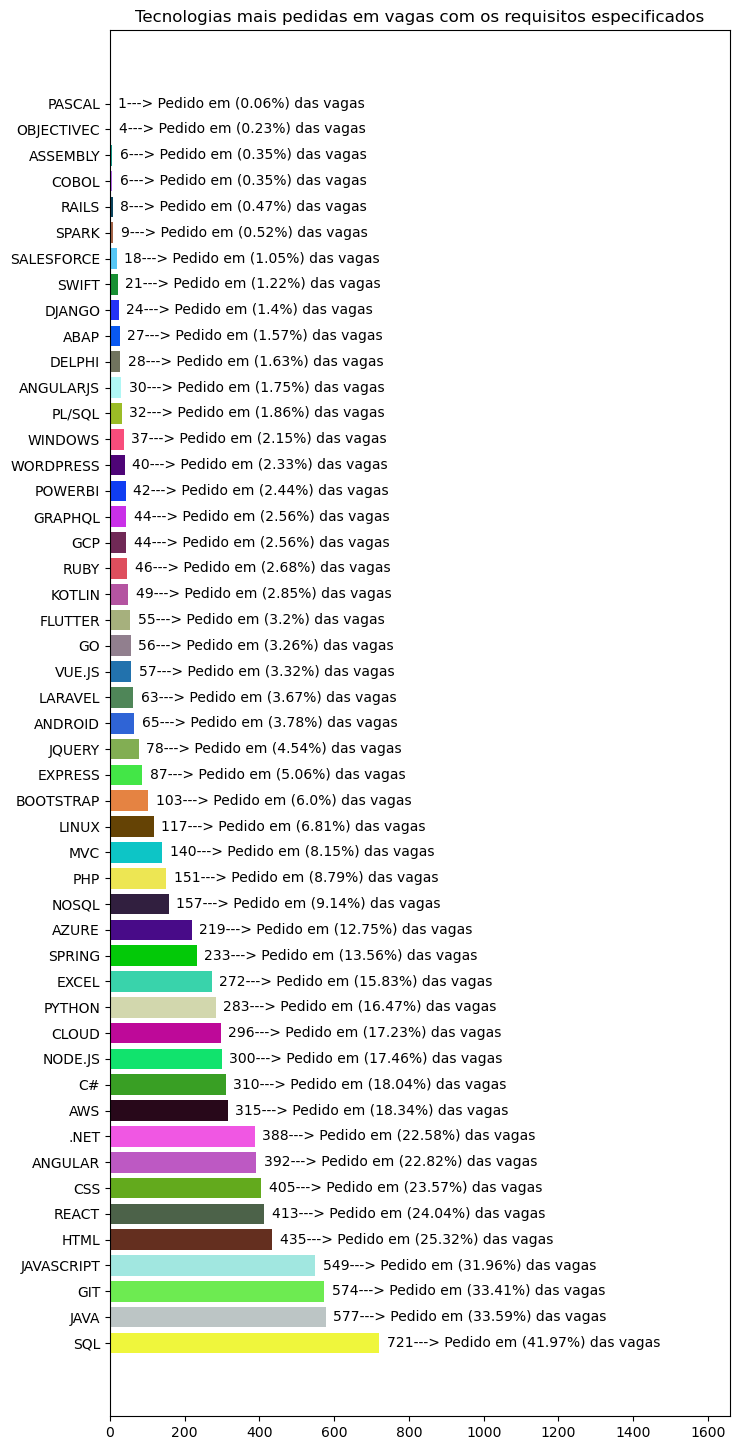

In [37]:
contagem_tecnologias = df.lista.value_counts()
cores = []
for _ in range(len(contagem_tecnologias)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(8, 18))

bars = plt.barh(contagem_tecnologias.index, contagem_tecnologias, color=cores)
plt.title("Tecnologias mais pedidas em vagas com os requisitos especificados")

for bar, valor in zip(bars, contagem_tecnologias):
    plt.text(bar.get_width()+20, bar.get_y() + bar.get_height()/2, f'{valor}---> Pedido em ({round((valor / (len(df_temp))*100),2)}%) das vagas', ha='left', va='center')
plt.xlim(right=max(contagem_tecnologias) * 2.3)
plt.show()

In [38]:
# dados_nao_nulos = dados_nao_nulos.drop(columns=['lista'])

In [39]:
# dados_nao_nulos[dados_nao_nulos['requisitos'].str.contains("GIT")].loc[10].description

In [40]:
regex_str_posicao = 'Estagiário|Estagiario|Junior|Júnior|JR|Nivel 1|Nivel I|Nível 1|Nível I|Pleno/Sênior|Senior|Sênior|SR|Pleno|Tech Lead|Tech-lead|Diretor|Coordenador|Gerente'


In [41]:
#Buscar posicao no titulo da vaga
def busca_posicao(title):
    tecnologia =''
    if re.findall(regex_str_posicao, title,re.IGNORECASE) != []:
        tecnologia = re.findall(regex_str_posicao, title,re.IGNORECASE)[0].upper().replace(" ","").replace("-","")
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia 

def busca_posicao_detalhe(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

def busca_posicao_descricao(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

In [42]:
dados_nao_nulos['posicao'] = dados_nao_nulos.title.apply(lambda x: busca_posicao(x))

In [43]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.experience_level.apply(lambda x: busca_posicao_detalhe(x))

In [44]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.description.apply(lambda x: busca_posicao_descricao(x))

In [45]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['SR', 'SENIOR']),'posicao']="SÊNIOR"


In [46]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JR']),'posicao']="JUNIOR"


In [47]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JÚNIOR']),'posicao']="JUNIOR"


In [48]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['NÍVELI','NÍVEL1']),'posicao']="JUNIOR"

In [49]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['TECH LEAD,TECH-LEAD']),'posicao']="TECH-LEAD"

In [50]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['ESTAGIÁRIO']),'posicao']="ESTAGIARIO"

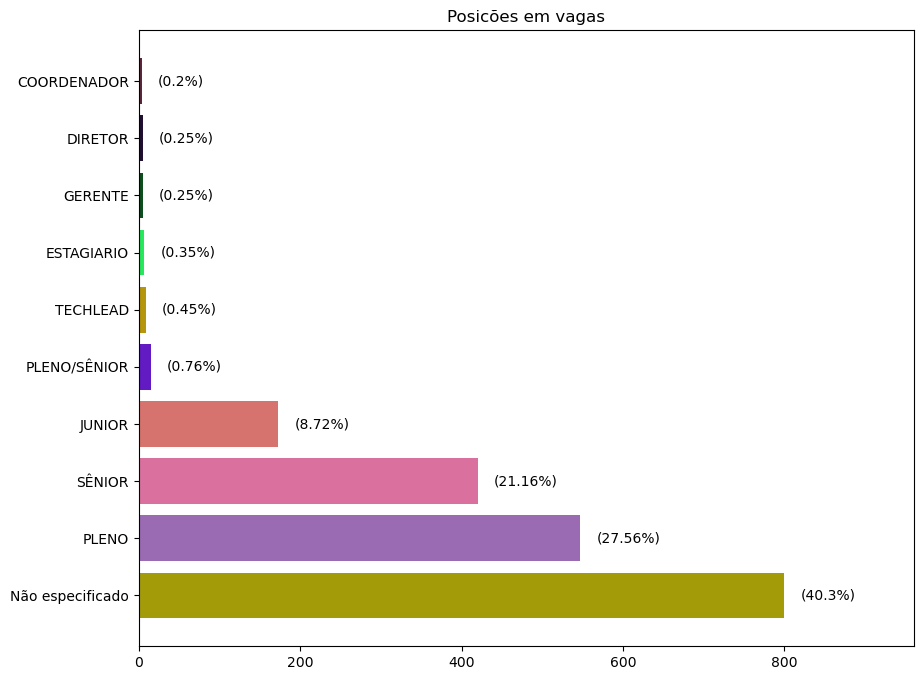

In [51]:
contagem_posicoes = dados_nao_nulos.posicao.value_counts()
cores = []
for _ in range(len(contagem_posicoes)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(10, 8))

bars = plt.barh(contagem_posicoes.index, contagem_posicoes, color=cores)
plt.title("Posicões em vagas")

for bar, valor in zip(bars, contagem_posicoes):
    plt.text(bar.get_width()+20, bar.get_y() + bar.get_height()/2, f'({round((valor / (len(dados_nao_nulos.posicao)))*100,2)}%)', ha='left', va='center')
plt.xlim(right=max(contagem_posicoes) * 1.2)
plt.show()

In [52]:
dados_grafico2=dados_nao_nulos[(dados_nao_nulos.posicao!='Não especificado') & (dados_nao_nulos.requisitos!='Não especificado')]


In [53]:
dados_explodidos = dados_grafico2.assign(requisitos=dados_grafico2['requisitos'].str.split(', ')).explode('requisitos')

# Em seguida, agrupe pelos valores da coluna 'posicao' e conte os valores da coluna 'requisitos' após a explosão
contagem_requisitos = dados_explodidos.groupby('posicao')['requisitos'].value_counts()

contagem_requisitos2 = dados_explodidos.groupby(['posicao', 'requisitos']).size()

# Use value_counts() e depois nlargest() para obter os 10 principais valores
top10_por_posicao = contagem_requisitos2.groupby(level=0).nlargest(10).reset_index(level=1, drop=True)

# Agora você tem a contagem de cada requisito para cada posição


In [54]:
contagem_requisitos.value_counts()

count
1     43
2     24
3     21
5     13
4      9
      ..
10     1
35     1
24     1
37     1
75     1
Name: count, Length: 66, dtype: int64

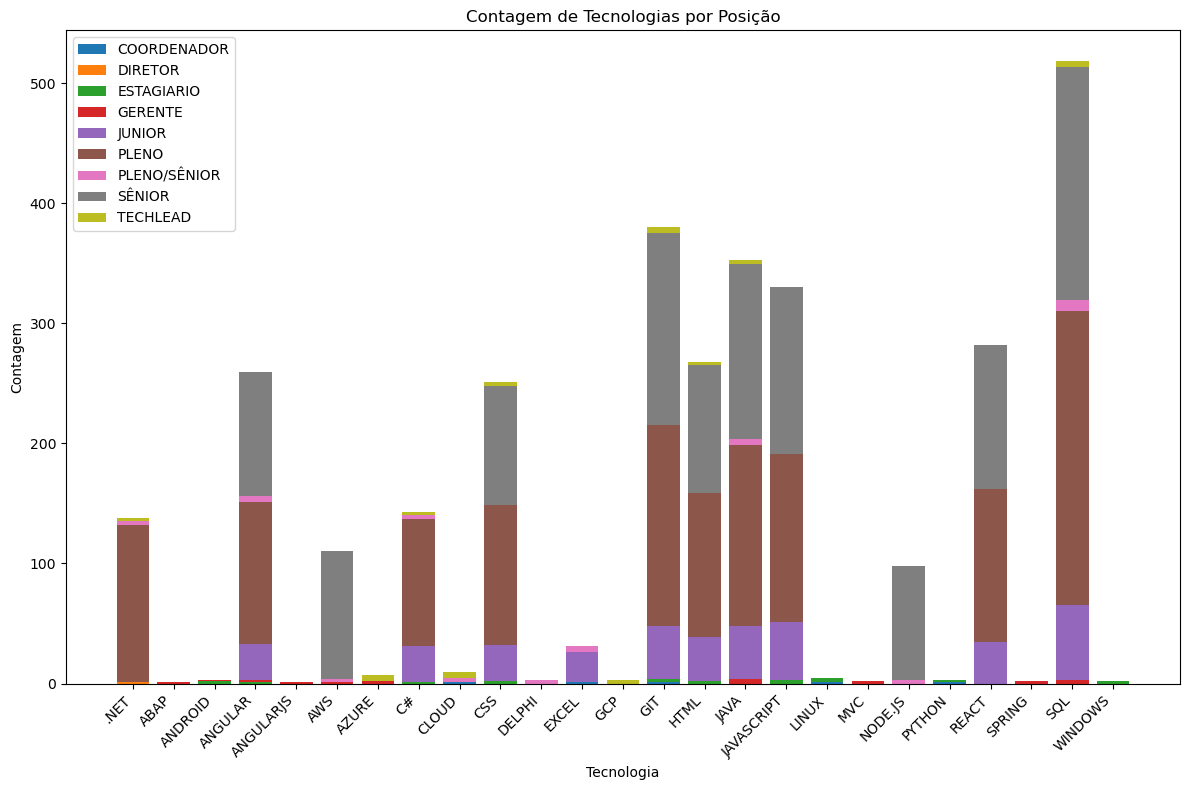

In [55]:
dados = top10_por_posicao

posicoes = sorted(set(posicao for posicao, _ in dados.keys()))
tecnologias = sorted(set(tecnologia for _, tecnologia in dados.keys()))

# Criar uma matriz de contagem de tecnologias para todas as posições
matriz_contagem = np.zeros((len(posicoes), len(tecnologias)))

# Preencher a matriz com as contagens reais
for i, posicao in enumerate(posicoes):
    for j, tecnologia in enumerate(tecnologias):
        matriz_contagem[i, j] = dados.get((posicao, tecnologia), 0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))

bottom = np.zeros(len(tecnologias))
for i, posicao in enumerate(posicoes):
    plt.bar(tecnologias, matriz_contagem[i], label=posicao, bottom=bottom)
    bottom += matriz_contagem[i]

plt.xlabel('Tecnologia')
plt.ylabel('Contagem')
plt.title('Contagem de Tecnologias por Posição')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

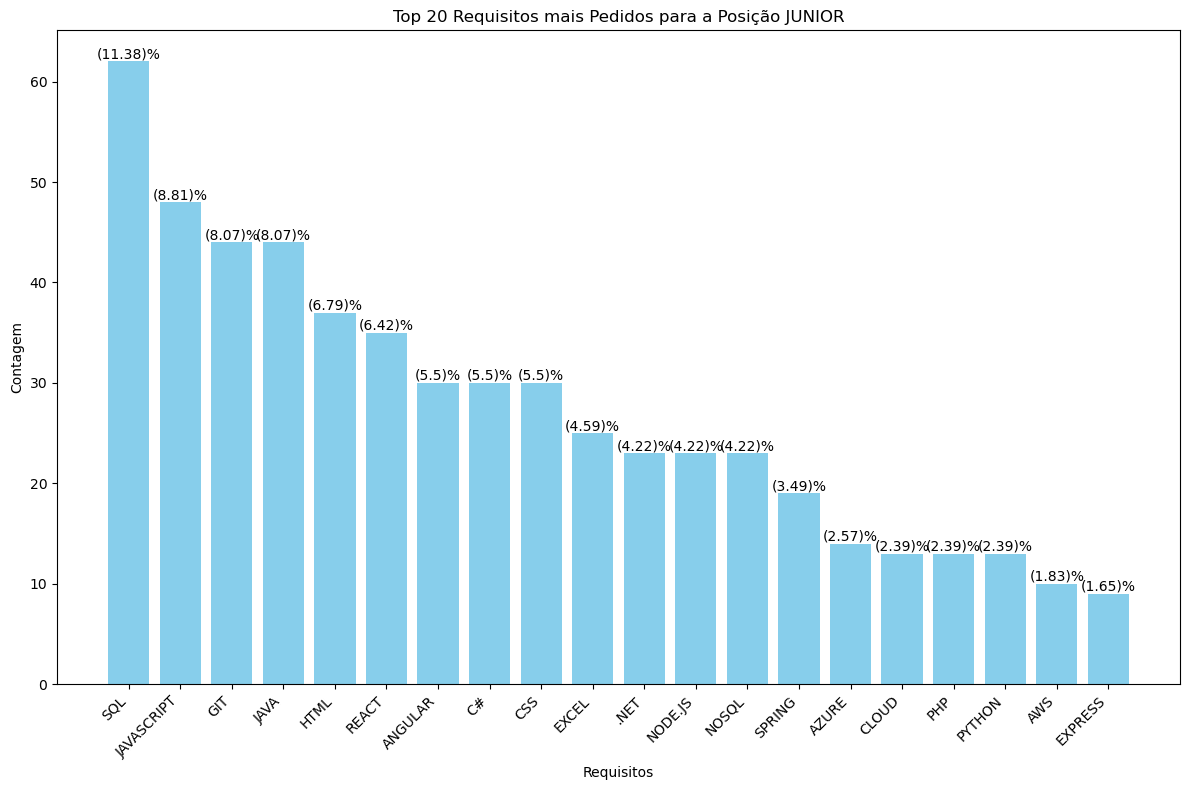

In [56]:
dados_junior = contagem_requisitos.loc['JUNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_junior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars=plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='skyblue')

for bar, valor in zip(bars, dados_junior_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_junior_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição JUNIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

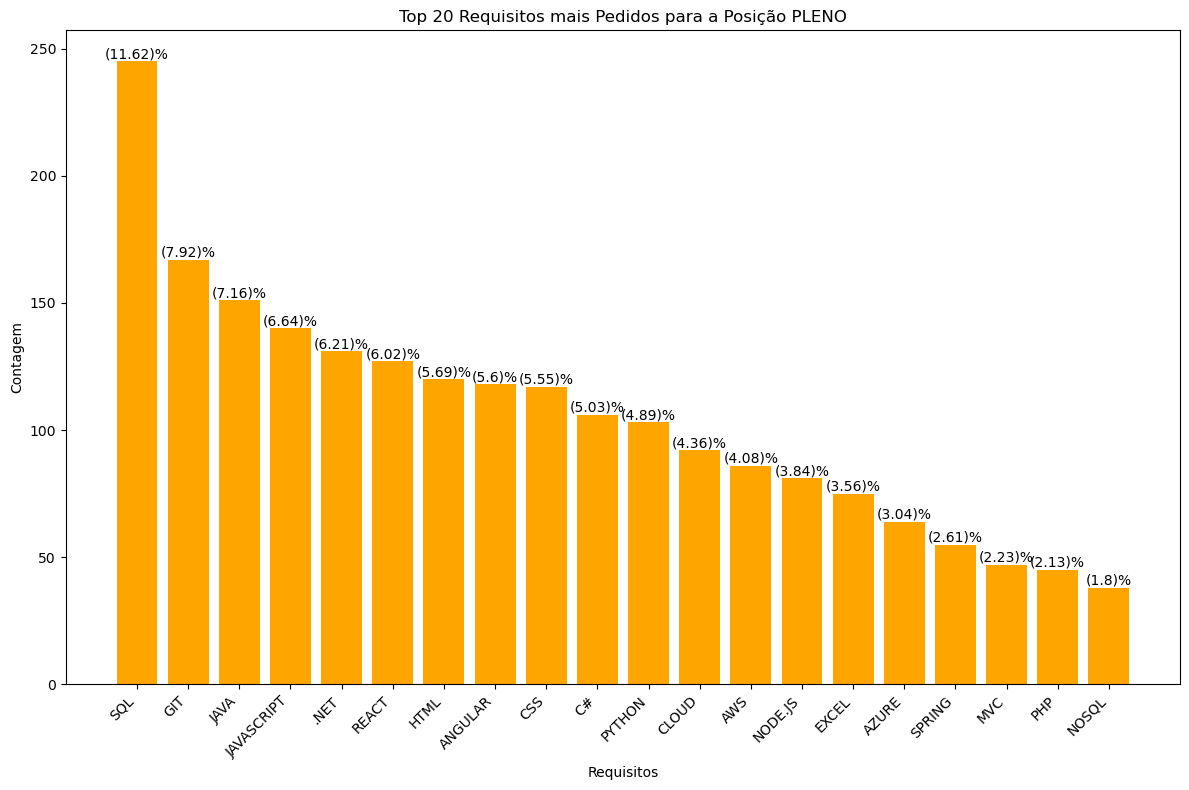

In [57]:
# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_pleno = contagem_requisitos.loc['PLENO']
dados_pleno_top10 = dados_pleno.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados_pleno_top10.index, dados_pleno_top10.values, color='orange')

for bar, valor in zip(bars, dados_pleno_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_pleno_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição PLENO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

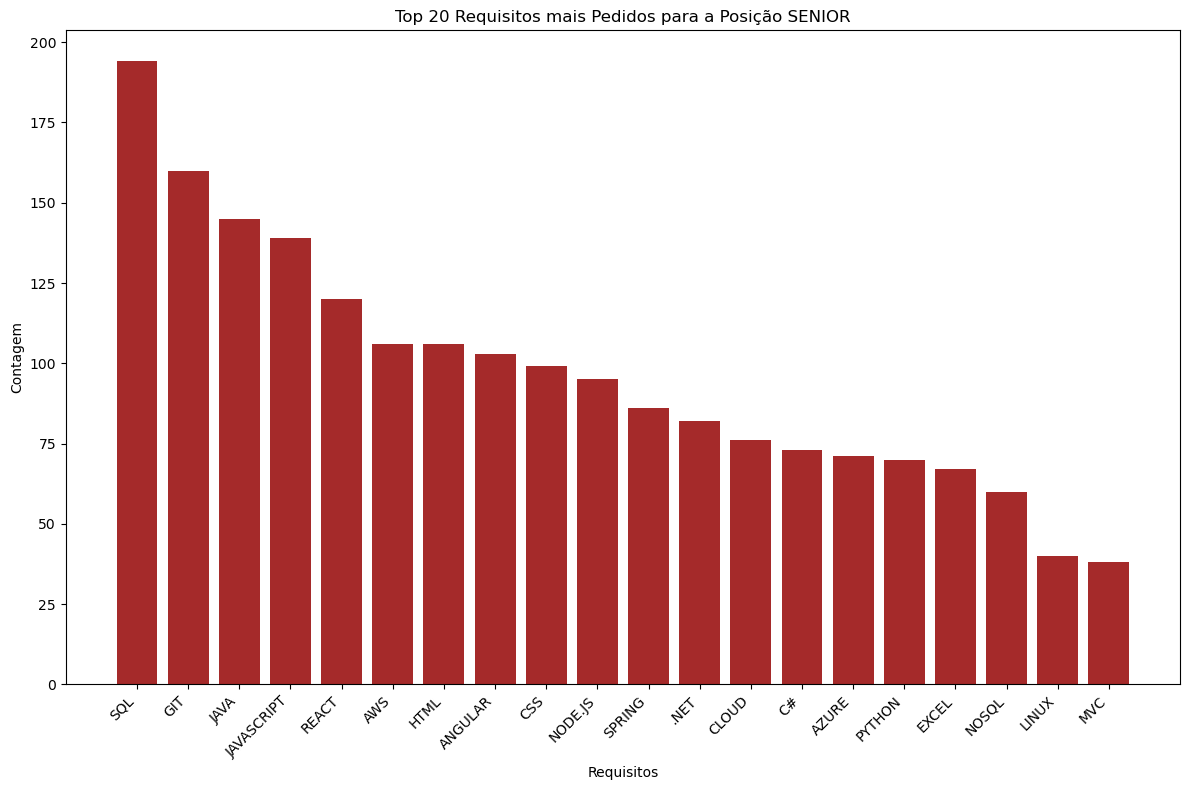

In [58]:
dados_senior = contagem_requisitos.loc['SÊNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_senior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='brown')
plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição SENIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
dados_nao_nulos.isnull().sum()

title               0
location            0
time_opened         0
link                0
applications        0
experience_level    0
job_type            0
role                0
sectors             0
description         0
requisitos          0
lista               0
posicao             0
dtype: int64